In [12]:
import os, sys, time, glob
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
sns.set_style("ticks")
sns.set_context(context="talk")

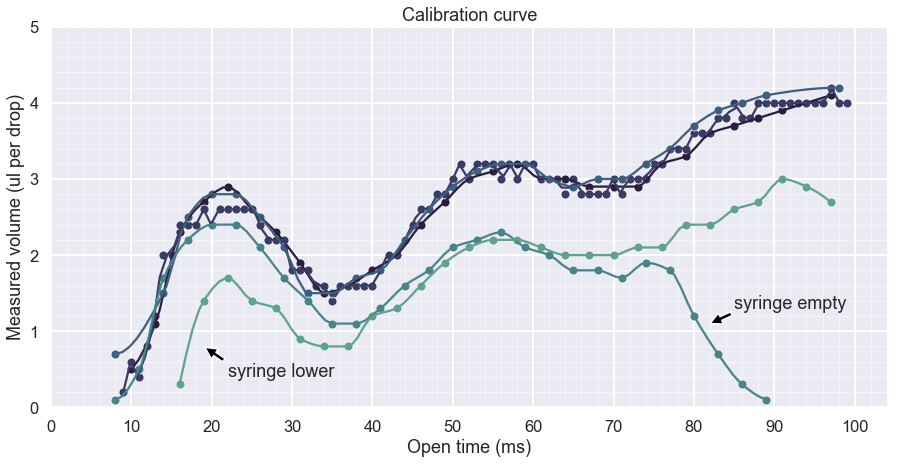

In [16]:
## READ IN CALIBRATION CURVE FILES FROM CSHL
calibration_path = os.path.join('/Users/urai/Data', 'calibrations_water')
csvfiles = glob.glob(os.path.join(calibration_path, '*_calibration_function.csv'))

# OUTPUT OVERVIEW FIGURE
sns.set()
sns.set_context(context="talk")
sns.set_palette(sns.cubehelix_palette(8, start=.5, rot=-.75, reverse=True))
f, ax = plt.subplots(1,1, figsize=(15, 7))

for i, filename in enumerate(csvfiles):
    # print(filename)
    # READ IN
    df1 = pd.read_csv(os.path.join(calibration_path, filename), index_col=None)
    df1 = df1[df1.weight_perdrop < 10]
    df1 = df1[df1.weight_perdrop > 0]
    df1 = df1.dropna()

    # FIT EXTRAPOLATION FUNCTION
    if df1.shape[0] > 10:
        time2vol = sp.interpolate.pchip(df1["open_time"], df1["weight_perdrop"]) # for later
        xp = np.linspace(df1["open_time"].min(), df1["open_time"].max(), 100)

        # CALIBRATION CURVE
        sns.lineplot(xp, time2vol(xp), ax=ax)
        sns.scatterplot(x="open_time", y="weight_perdrop", data=df1, ax=ax)

ax.annotate('syringe empty', xy=(82, 1.1), xytext=(85, 1.3),
    arrowprops=dict(facecolor='black'))
ax.annotate('syringe lower', xy=(19, 0.8), xytext=(22, 0.4), arrowprops=dict(facecolor='black', shrink=0.05))
ax.set(xlabel="Open time (ms)", ylabel="Measured volume (ul per drop)", title="Calibration curve", 
       ylim=[0, 5], xticks=np.linspace(0, 100, 11))

ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='w', linewidth=2.0)
ax.grid(b=True, which='minor', color='w', linewidth=0.5)
plt.draw()
f.savefig(os.path.join(calibration_path, 'calibration_curve_pythonrig_cshl.pdf'))
